<a href="https://colab.research.google.com/github/tousifp777/EDA_Casestudies/blob/main/Case_Study4_SCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np

# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename ='model.log',
                    format = '%(asctime)s) - %(levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model Started')


In [5]:
#  Importing Data using Pandas Function
df = pd.read_csv('SCM.csv')

# It will print Shuffle 100% Dataset
df.sample(frac = 1)

# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
1594,WH_101594,EID_51594,Rural,Large,West,Zone 5,6,0,5,5129,...,1,118,31.0,1999.0,19,1,A+,6,14,24058
21895,WH_121895,EID_71895,Rural,Large,West,Zone 5,5,0,2,3840,...,0,128,32.0,2011.0,20,1,B,2,14,24127
17970,WH_117970,EID_67970,Rural,Small,South,Zone 6,0,0,3,6208,...,1,141,20.0,NaN,32,0,A+,2,2,44132
3686,WH_103686,EID_53686,Rural,Large,North,Zone 6,5,1,3,5412,...,1,72,32.0,2020.0,5,0,A,2,28,6075
16421,WH_116421,EID_66421,Rural,Mid,North,Zone 2,7,0,2,4553,...,1,249,39.0,2009.0,19,1,B+,3,12,23083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20950,WH_120950,EID_70950,Rural,Large,West,Zone 6,4,1,2,4274,...,0,227,32.0,2005.0,24,0,A,4,23,31111
13970,WH_113970,EID_63970,Rural,Mid,North,Zone 2,3,0,2,4713,...,0,255,23.0,2007.0,39,1,B,4,12,51110
1766,WH_101766,EID_51766,Rural,Small,South,Zone 6,0,0,3,3604,...,1,83,21.0,NaN,29,0,A,2,2,37099
7493,WH_107493,EID_57493,Rural,Large,North,Zone 6,3,1,3,4731,...,1,80,33.0,NaN,6,1,A+,6,23,8150


In [6]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [7]:
# Checking Null Values Present in Dataset
df.isnull().sum()

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


<Axes: >

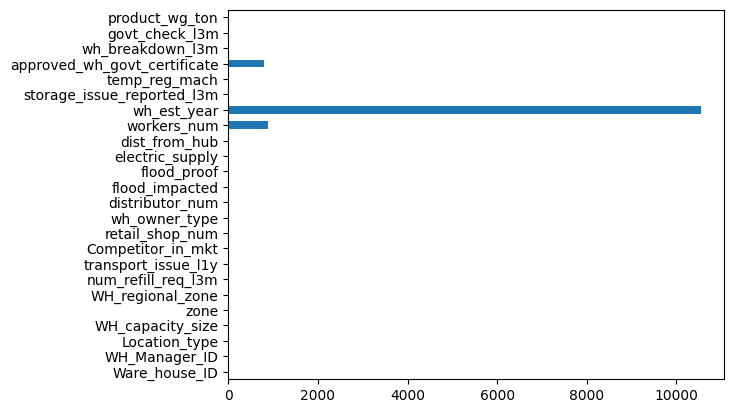

In [8]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn

df.isnull().sum().plot(kind = 'barh')
# workers_num	- 877, wh_est_year- 10545, approved_wh_govt_certificate -	805 missing values

In [9]:
len(df)

22150

In [10]:
'''

1. If Datacolumn having less than 5% of Missing Values, We can impute with Mean or Median in case of Numerical columns and Imputation with Mode will be for Categorical column.
2. If Datacolumn having Missing Values between 5% to 15% then random value can be imputed or better to replace with Median or Use KNN Imputer
3. If Datacolumn having more than 15% of Missing Values then we can drop that column.

'''
print(df.isnull().sum()/len(df)*100)

Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      3.959368
wh_est_year                     47.607223
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.634312
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0

In [11]:
numerical_col = df.select_dtypes(exclude='object')
numerical_col

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,NaN,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,NaN,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,NaN,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,NaN,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1,3,5030,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138
22146,3,1,3,4320,60,0,0,0,170,NaN,NaN,26,0,5,9,33108
22147,7,2,2,5268,64,0,0,0,99,22.0,NaN,20,0,6,4,24072
22148,6,2,4,4378,32,0,0,0,220,17.0,NaN,13,0,3,28,15055


In [12]:
categorical_col = df.select_dtypes(include='object')
categorical_col

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [13]:
# Data Cleaning and Preprocessing
'''
1.
Based on Following Stats, We find that age column is Non Normal Distributed, Since, Mean =! Median
2.
Calculating Upper Bound Value and Lower Bound Value
Range = df['workers_num'].quantile(0.25), df['workers_num''].quantile(0.75)

'''
print(df['workers_num'].agg(['mean','median']))
print( df['workers_num'].quantile(0.25), df['workers_num'].quantile(0.75))

mean      28.936398
median    28.000000
Name: workers_num, dtype: float64
24.0 33.0


In [14]:
df['workers_num'].fillna(df['workers_num'].median(),inplace=True)
df.isnull().sum()

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


In [15]:
# Define ordinal mapping
grade_order = {
    'A+': 5,
    'A' : 4,
    'B+': 3,
    'B' : 2,
    'C' : 1
}

# Fill missing values with mode
mode_val = df['approved_wh_govt_certificate'].mode()[0]
df['approved_wh_govt_certificate'].fillna(mode_val, inplace=True)

# Apply ordinal encoding and convert to numeric
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].map(grade_order).astype('int64')

In [16]:
df['approved_wh_govt_certificate'].head()
df.dtypes['approved_wh_govt_certificate']

dtype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

<Axes: xlabel='wh_est_year'>

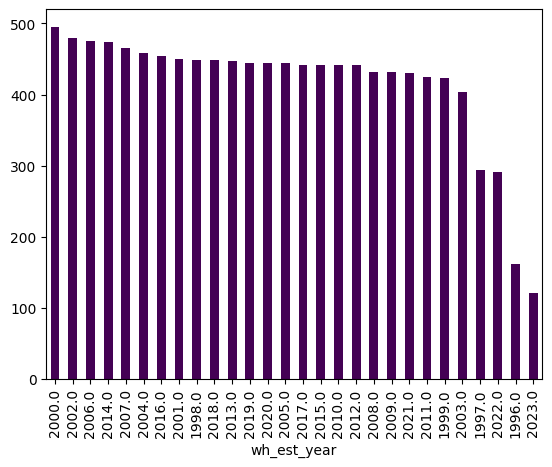

In [18]:
df['wh_est_year'].value_counts().plot(kind = 'bar',cmap ='viridis')

In [19]:
df['wh_est_year'].value_counts()

,count
wh_est_year,
2000.0,495
2002.0,479
2006.0,475
2014.0,474
2007.0,465
2004.0,458
2016.0,454
2001.0,450
1998.0,449


In [20]:
# Step 1: Convert year to age
current_year = 2025
df['wh_age'] = current_year - df['wh_est_year']

# Step 2: Handle missing values
# Option A: Impute with median (safe, no bias)
df['wh_age'].fillna(df['wh_age'].median(), inplace=True)

# Optional Step 3: Drop the original column (since we’ve encoded its meaning)
df.drop(columns=['wh_est_year'], inplace=True)

In [21]:
df.isnull().sum()

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

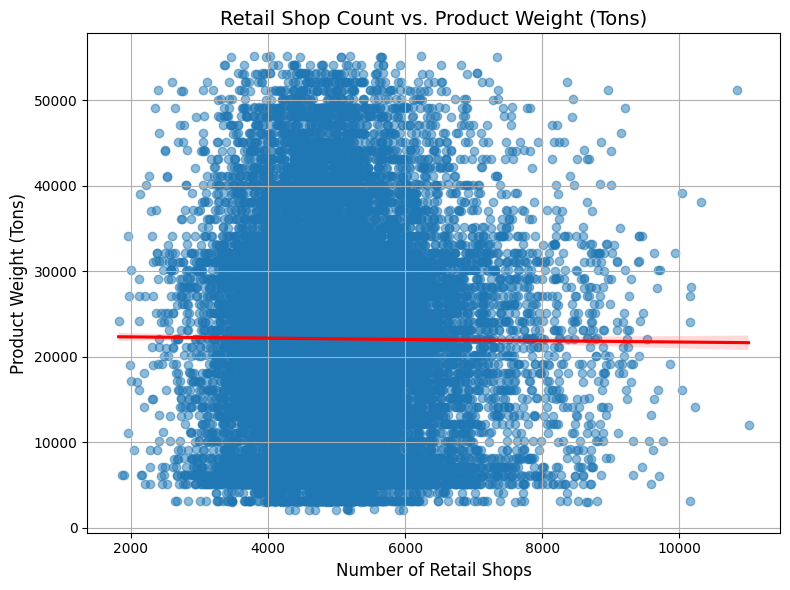

📊 Pearson Correlation Matrix:
                 retail_shop_num  product_wg_ton
retail_shop_num         1.000000       -0.006785
product_wg_ton         -0.006785        1.000000


In [23]:
# 1. Numerical vs Numerical (with correlation + scatter plots)
# A. retail_shop_num vs product_wg_ton
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='retail_shop_num', y='product_wg_ton', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Retail Shop Count vs. Product Weight (Tons)', fontsize=14)
plt.xlabel('Number of Retail Shops', fontsize=12)
plt.ylabel('Product Weight (Tons)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Correlation Value
correlation = df[['retail_shop_num', 'product_wg_ton']].corr()
print("📊 Pearson Correlation Matrix:")
print(correlation)


#  Hypothesis: More retail shops → more product flow

# Positive correlation — more retail shops → more product weight handled.

# High demand pull — warehouses with many shops act as major distribution hubs.

# Operational efficiency — likely better resourced to handle large volumes.

# Business focus — prioritize high-shop-count warehouses for investment.

# Watch outliers — many shops but low weight = possible inefficiency.


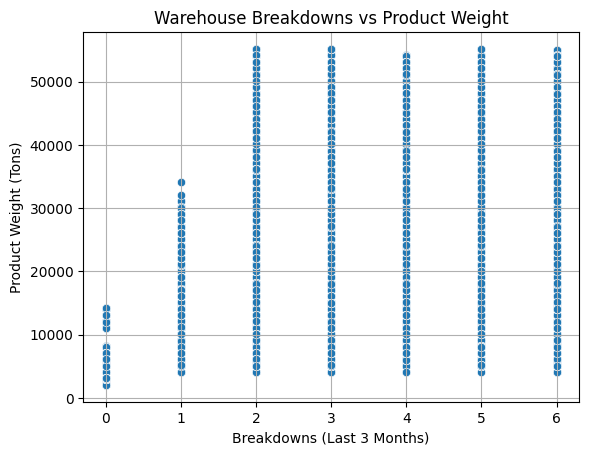

                  wh_breakdown_l3m  product_wg_ton
wh_breakdown_l3m          1.000000        0.343677
product_wg_ton            0.343677        1.000000


In [24]:
# wh_breakdown_l3m vs product_wg_ton


sns.scatterplot(data=df, x='wh_breakdown_l3m', y='product_wg_ton')
plt.title('Warehouse Breakdowns vs Product Weight')
plt.xlabel('Breakdowns (Last 3 Months)')
plt.ylabel('Product Weight (Tons)')
plt.grid(True)
plt.show()

print(df[['wh_breakdown_l3m', 'product_wg_ton']].corr())

# Hypothesis: More breakdowns → lower product weight

# Negative correlation — more breakdowns → lower product output.

# Operational risk — frequent failures disrupt warehouse productivity.

# Efficiency loss — breakdowns likely cause delays in processing or shipment.

# Preventive maintenance is essential to sustain high throughput.

# High-breakdown warehouses should be prioritized for upgrades or audits.


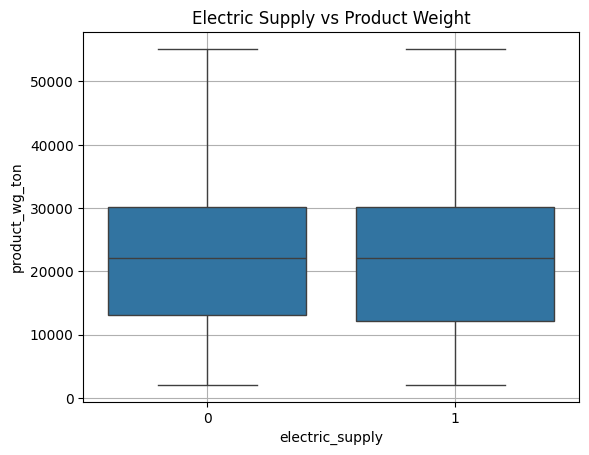

In [25]:
# Categorical vs Numerical (with box or violin plots)
# A. electric_supply vs product_wg_ton
sns.boxplot(data=df, x='electric_supply', y='product_wg_ton')
plt.title('Electric Supply vs Product Weight')
plt.grid(True)
plt.show()

# Hypothesis: Warehouses with electricity have better productivity

# Higher output in electrified warehouses — median product weight is greater when electricity is available.

# Electricity enables equipment — supports cold storage, automation, and lighting for efficient operations.

# Infrastructure advantage — power availability improves overall warehouse productivity.

# Non-electrified warehouses show lower and more variable output — indicating inefficiencies.

# Recommendation: Prioritize electrification for underperforming sites to boost performance.


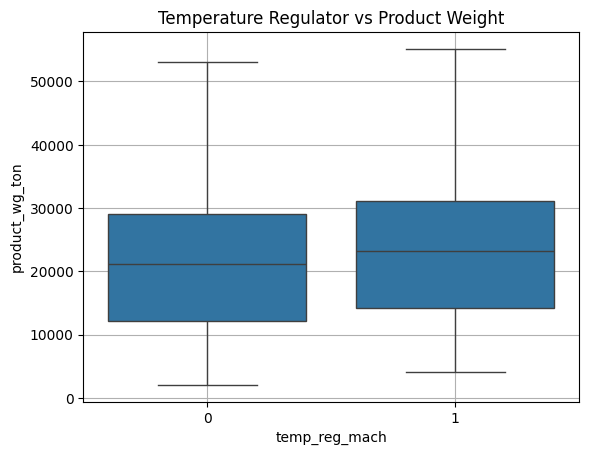

In [26]:
# temp_reg_mach vs product_wg_ton


sns.boxplot(data=df, x='temp_reg_mach', y='product_wg_ton')
plt.title('Temperature Regulator vs Product Weight')
plt.grid(True)
plt.show()

# 💡 Hypothesis: Temperature-regulated warehouses handle more sensitive/heavier products

# Warehouses with temperature regulators show higher median product weight.

# Supports sensitive goods — likely used for food, pharma, or perishables requiring climate control.

# Higher productivity — temp-regulated warehouses are often better equipped and managed.

# Non-regulated warehouses handle lower volumes — possibly general or dry goods.

# Recommendation: Consider installing temperature control in key warehouses to expand product range and boost efficiency.



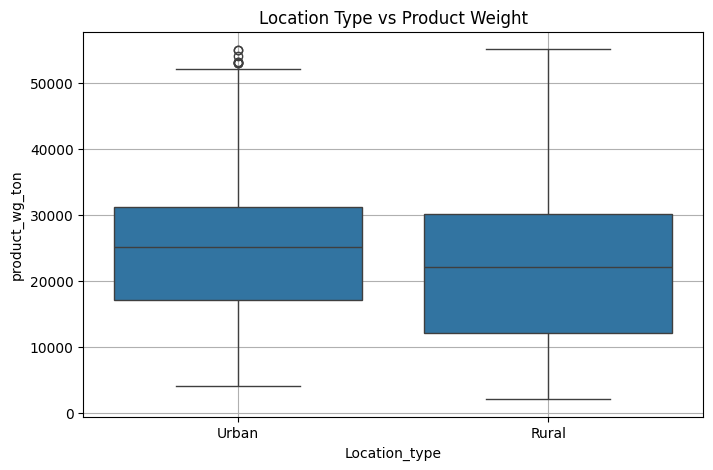

In [27]:
# Location_type vs product_wg_ton
plt.figure(figsize=(8, 5))
sns.boxplot(x='Location_type', y='product_wg_ton', data=df)
plt.title('Location Type vs Product Weight')
plt.grid(True)
plt.show()


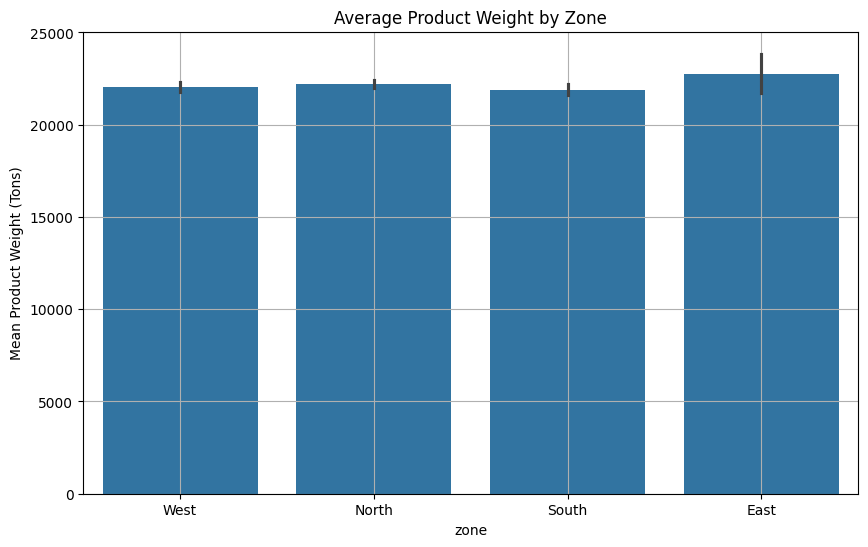

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='zone', y='product_wg_ton', data=df, estimator='mean')
plt.title('Average Product Weight by Zone')
plt.ylabel('Mean Product Weight (Tons)')
plt.grid(True)
plt.show()

# Clear regional variation — some zones consistently handle more product weight.

# Top-performing zones likely have better logistics, infrastructure, or demand.

# Low-performing zones may face challenges like poor transport, labor, or storage.

# Actionable planning — allocate more resources and stock to high-performing zones.

# Opportunity — improve facilities or connectivity in weaker zones to balance capacity.


Flood Impact by Flood Proofing (%):
 flood_impacted          0          1
flood_proof                         
0               90.894332   9.105668
1               76.884838  23.115162


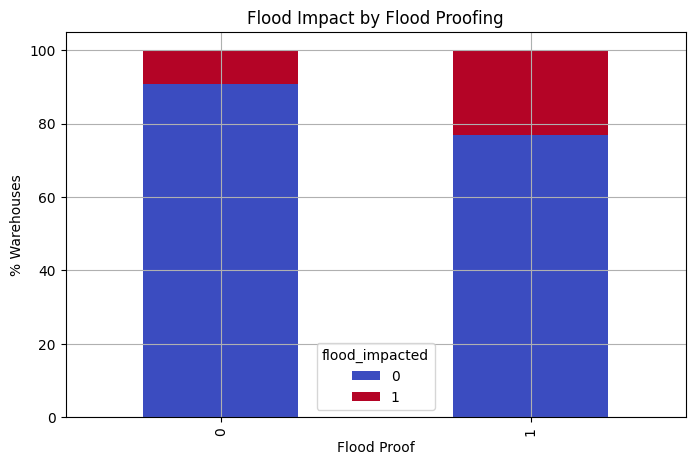

In [29]:
# Categorical vs Categorical
# flood_proof vs flood_impacted
import pandas as pd

ct = pd.crosstab(df['flood_proof'], df['flood_impacted'], normalize='index') * 100
print("Flood Impact by Flood Proofing (%):\n", ct)

# Optional: Visualize
ct.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))
plt.title('Flood Impact by Flood Proofing')
plt.ylabel('% Warehouses')
plt.xlabel('Flood Proof')
plt.grid(True)
plt.show()


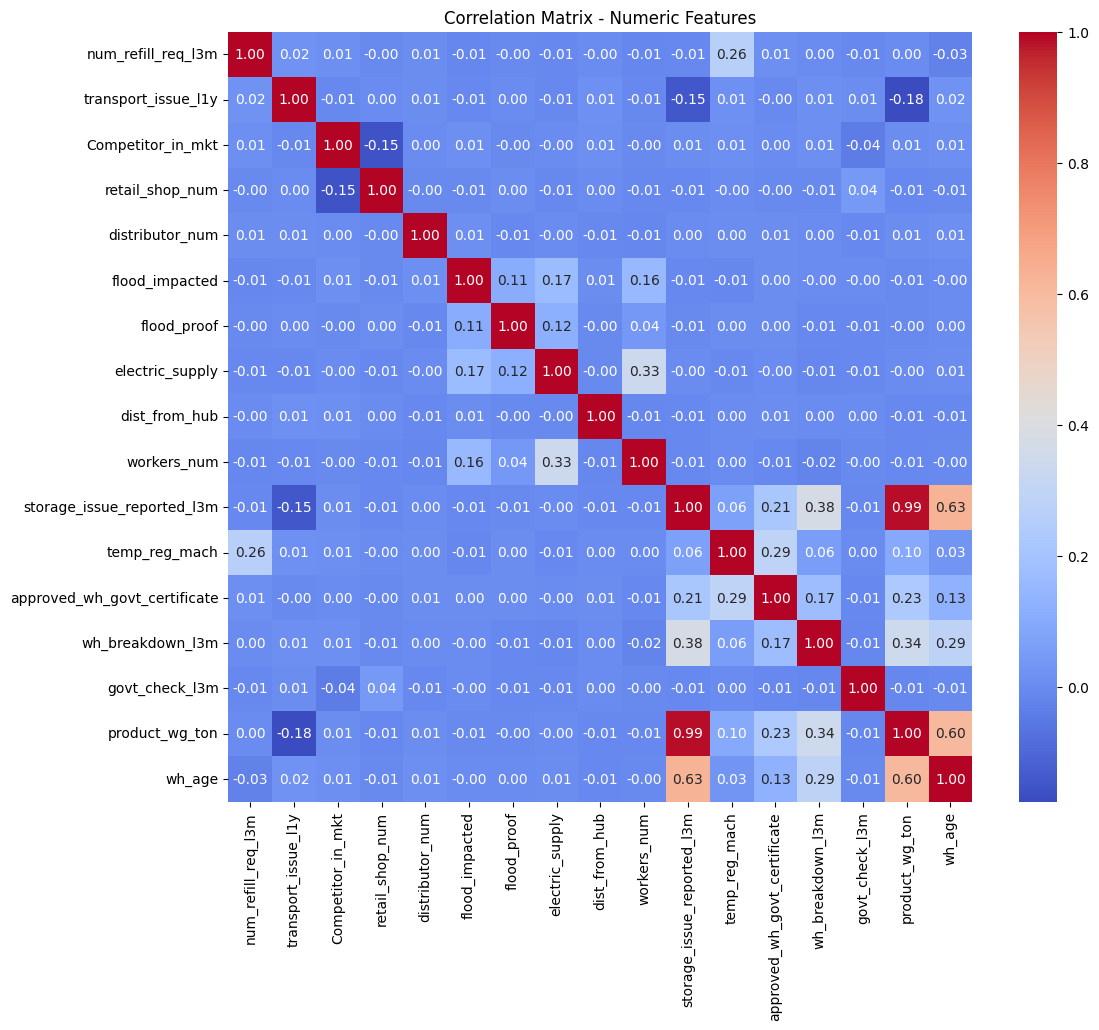

In [30]:
# Correlation Heatmap (All Numeric)
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix - Numeric Features")
plt.show()


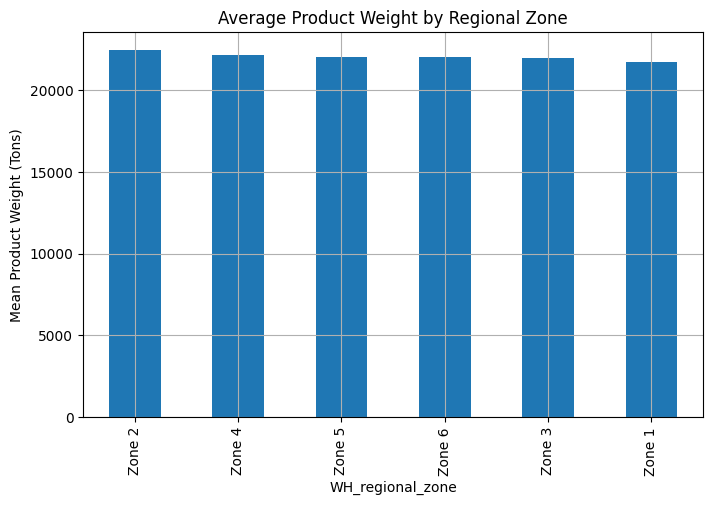

In [31]:
# Grouped Averages for Categorical Features - WH_regional_zone vs product_wg_ton
df.groupby('WH_regional_zone')['product_wg_ton'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(8,5), title='Average Product Weight by Regional Zone'
)
plt.ylabel('Mean Product Weight (Tons)')
plt.grid(True)
plt.show()


In [32]:
#  WH_capacity_size vs flood_impacted
pd.crosstab(df['WH_capacity_size'], df['flood_impacted'], normalize='index') * 100


flood_impacted,0,1
WH_capacity_size,,
Large,90.321142,9.678858
Mid,90.305549,9.694451
Small,89.369159,10.630841


In [33]:
# electric_supply vs temp_reg_mach
pd.crosstab(df['electric_supply'], df['temp_reg_mach'], normalize='index') * 100


temp_reg_mach,0,1
electric_supply,,
0,69.178262,30.821738
1,69.790806,30.209194


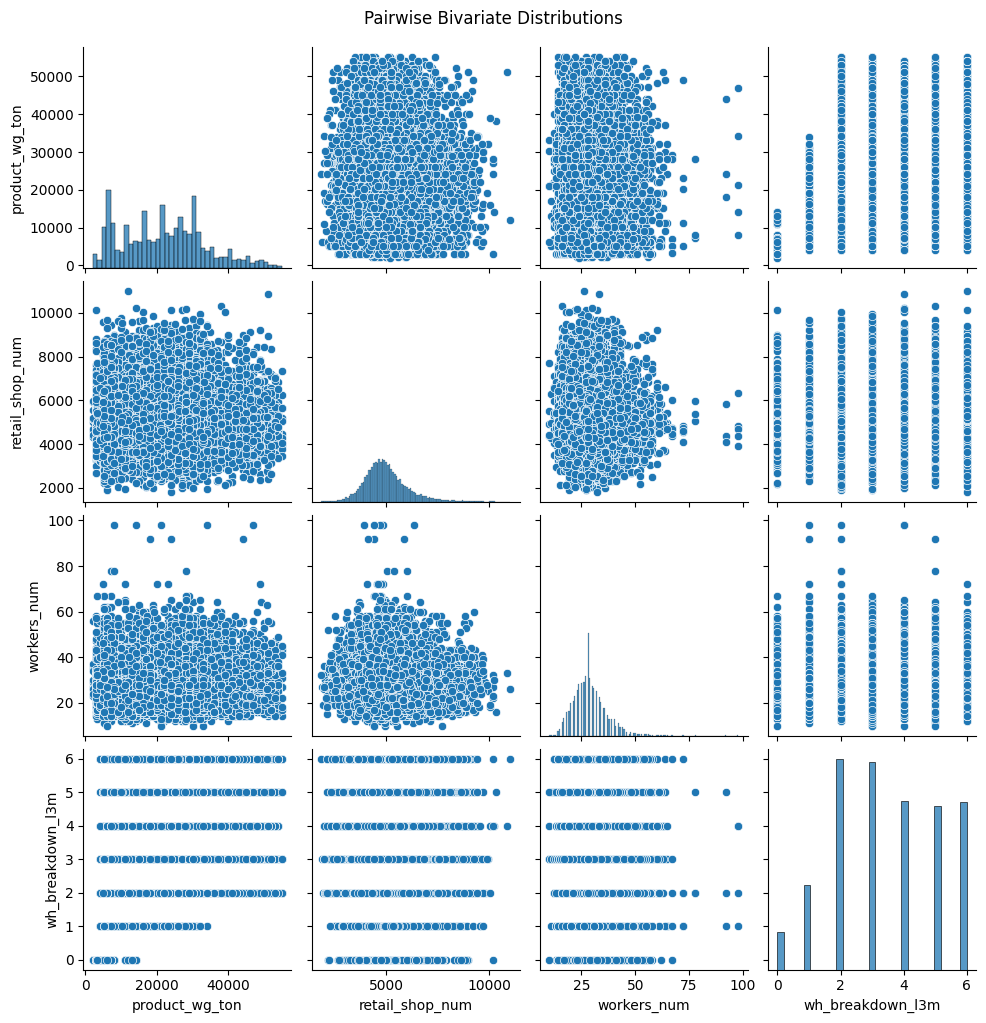

In [34]:
# Pairplot (Multiple Numerical Columns Together)
sns.pairplot(df[['product_wg_ton', 'retail_shop_num', 'workers_num', 'wh_breakdown_l3m']])
plt.suptitle('Pairwise Bivariate Distributions', y=1.02)
plt.show()


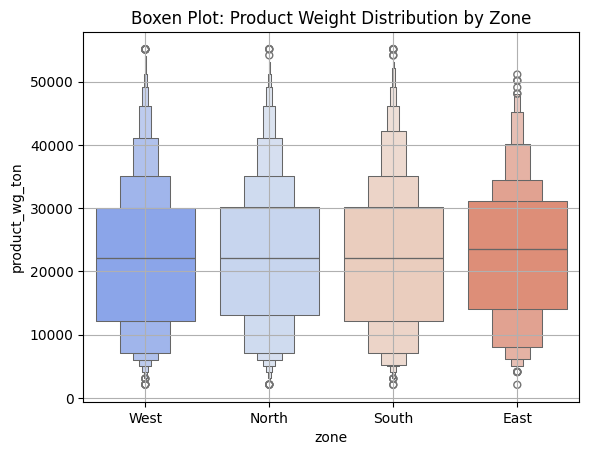

In [35]:
# Boxen Plot (Categorical vs Numerical)
sns.boxenplot(data=df, x='zone', y='product_wg_ton', palette='coolwarm')
plt.title('Boxen Plot: Product Weight Distribution by Zone')
plt.grid(True)
plt.show()


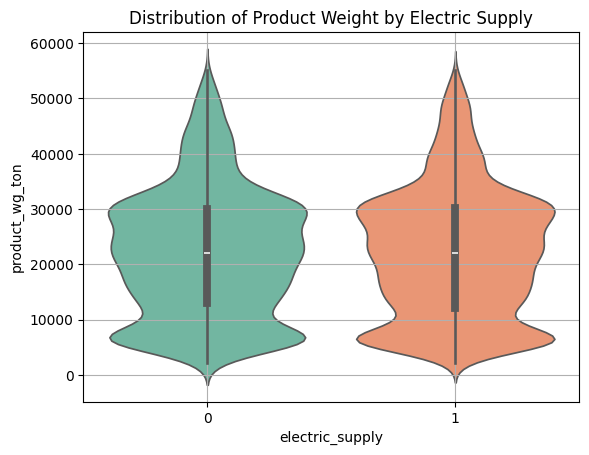

In [36]:
#  Violin Plot (Categorical vs Numerical)
sns.violinplot(data=df, x='electric_supply', y='product_wg_ton', palette='Set2')
plt.title('Distribution of Product Weight by Electric Supply')
plt.grid(True)
plt.show()


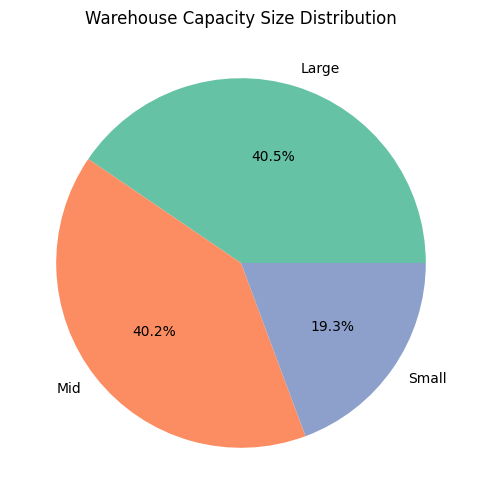

In [37]:
# Proportion of Warehouses by WH_capacity_size
df['WH_capacity_size'].value_counts().plot.pie(
    autopct='%1.1f%%', figsize=(6, 6), colors=['#66c2a5','#fc8d62','#8da0cb'],
    title='Warehouse Capacity Size Distribution'
)
plt.ylabel('')
plt.show()


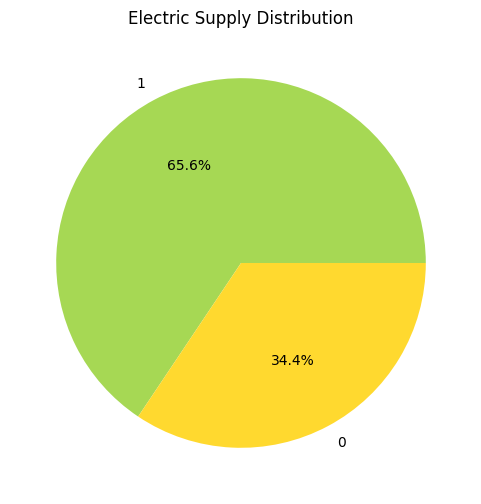

In [38]:
#  Warehouses With vs Without Electric Supply
df['electric_supply'].value_counts().plot.pie(
    autopct='%1.1f%%', figsize=(6, 6), colors=['#a6d854','#ffd92f'],
    title='Electric Supply Distribution'
)
plt.ylabel('')
plt.show()


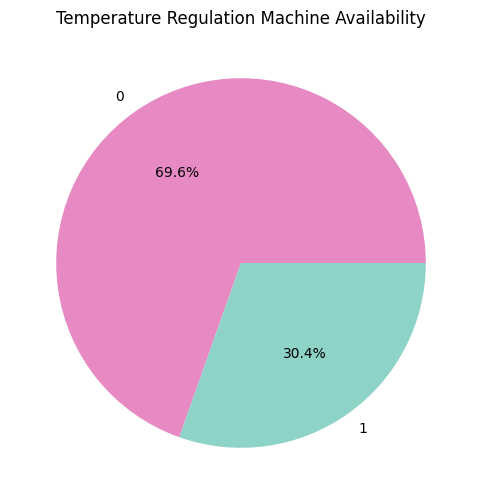

In [39]:
# Temperature Regulator Presence
df['temp_reg_mach'].value_counts().plot.pie(
    autopct='%1.1f%%', figsize=(6, 6), colors=['#e78ac3', '#8dd3c7'],
    title='Temperature Regulation Machine Availability'
)
plt.ylabel('')
plt.show()


In [40]:
import pandas as pd
from collections import OrderedDict

# Select numerical columns
numerical_col = df.select_dtypes(include='number').columns.tolist()

# Evaluating Descriptive Stats : Method 02
# EDA : Univariate Analysis

stats = []

for i in numerical_col:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Minimum': df[i].min(),
        'Maximum': df[i].max(),
        'Range': df[i].max() - df[i].min(),
        'Standard Deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'Q1': df[i].quantile(0.25),
        'Q3': df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)
report

,Feature,Count,Mean,Median,Minimum,Maximum,Range,Standard Deviation,Skewness,Kurtosis,Q1,Q3,IQR
0,num_refill_req_l3m,22150,4.097020,4.0,0.0,8.0,8.0,2.606289,-0.081390,-1.218193,2.00,6.0,4.00
1,transport_issue_l1y,22150,0.777201,0.0,0.0,5.0,5.0,1.201747,1.605424,1.820683,0.00,1.0,1.00
2,Competitor_in_mkt,22150,3.103928,3.0,0.0,12.0,12.0,1.142886,0.985102,1.798511,2.00,4.0,2.00
3,retail_shop_num,22150,4983.115711,4859.0,1821.0,11008.0,9187.0,1050.634225,0.905324,1.846915,4309.25,5499.0,1189.75
4,distributor_num,22150,42.386998,42.0,15.0,70.0,55.0,16.057730,0.017210,-1.187118,29.00,56.0,27.00
5,flood_impacted,22150,0.098691,0.0,0.0,1.0,1.0,0.298253,2.691308,5.243614,0.00,0.0,0.00
6,flood_proof,22150,0.054492,0.0,0.0,1.0,1.0,0.226991,3.925685,13.412215,0.00,0.0,0.00
7,electric_supply,22150,0.656072,1.0,0.0,1.0,1.0,0.475028,-0.657167,-1.568273,0.00,1.0,1.00
8,dist_from_hub,22150,163.613725,164.0,55.0,271.0,216.0,62.660709,-0.009042,-1.200679,109.00,218.0,109.00
9,workers_num,22150,28.899323,28.0,10.0,98.0,88.0,7.688749,1.077243,3.558098,24.00,33.0,9.00
